<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/titanic/my_first_data_analysis_for_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **라이브러리**

In [913]:
import numpy as np # 수치 연산
import pandas as pd # 데이터생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#
import missingno as msno

#warning 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [914]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터형성

In [915]:
df_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [916]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [917]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [918]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [919]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [920]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [921]:
df_train.shape

(891, 12)

In [922]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Null 데이터 확인하기

In [923]:
for col in df_train.columns:
    msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_train[col].isnull().sum()/ df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [924]:
for col in df_test.columns:
    msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 20.57%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.24%
column:      Cabin	 Percent of Nan value: 78.23%
column:   Embarked	 Percent of Nan value: 0.00%


# 시각화

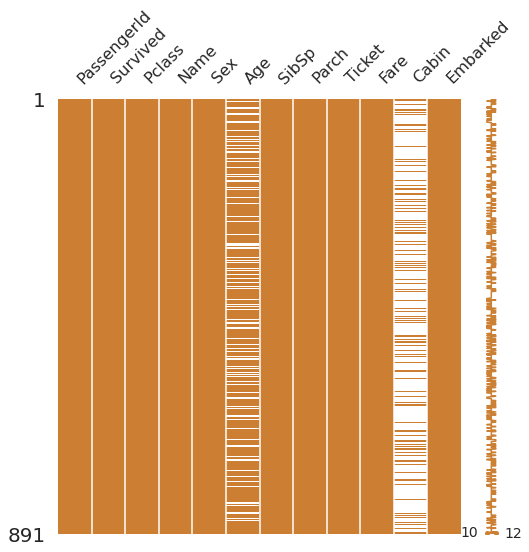

In [925]:
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8, 0.5, 0.2))

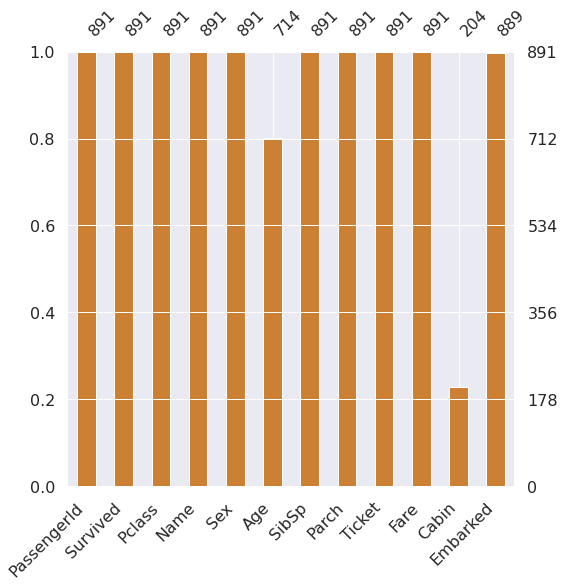

In [926]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8, 0.5, 0.2))

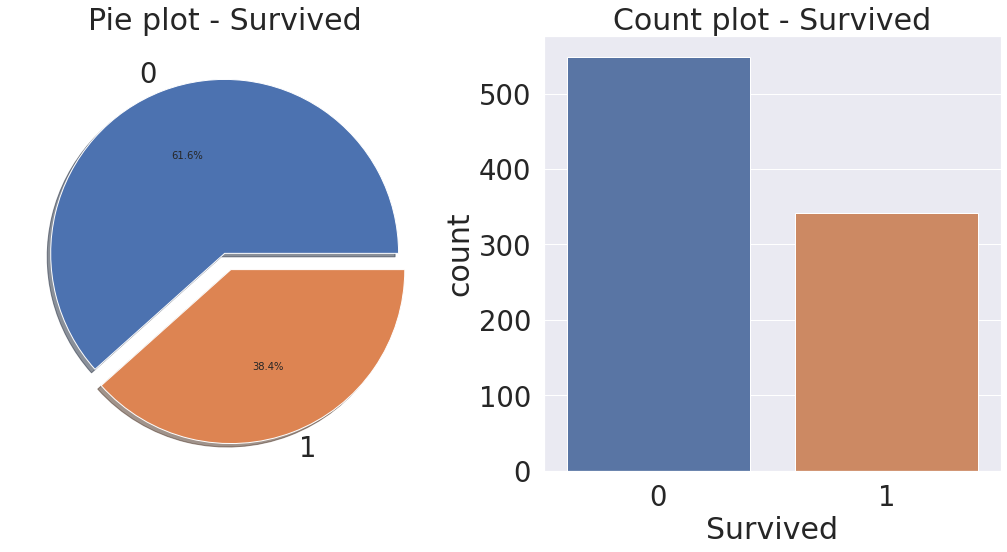

In [927]:
# 1행 2열 f는 figure 전체plot, ax는 axes 부분plot 가로 18 세로 8
f, ax=plt.subplots(1,2,figsize=(18,8))

#df_train['Survived'].value_counts()는 생존자수를 알려준다.
#pie는 원형으로 자료구성 explode는 간격 autopct 퍼센트의 형식
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train,ax=ax[1]) #Seaborn.countplot(카테고리,데이터,파트)
ax[1].set_title('Count plot - Survived')
plt.show()

# 2.1 Pclass

In [928]:
#각 객체들의 합 Sample의 합
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [929]:
#생존 0, 1 요소의 합
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [930]:
#생존 0, 1 비율 = 생존률
#as_index=False 하면 Pclass는 index로 안씀
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean() 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [931]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


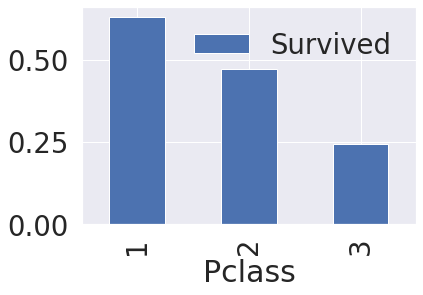

In [932]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

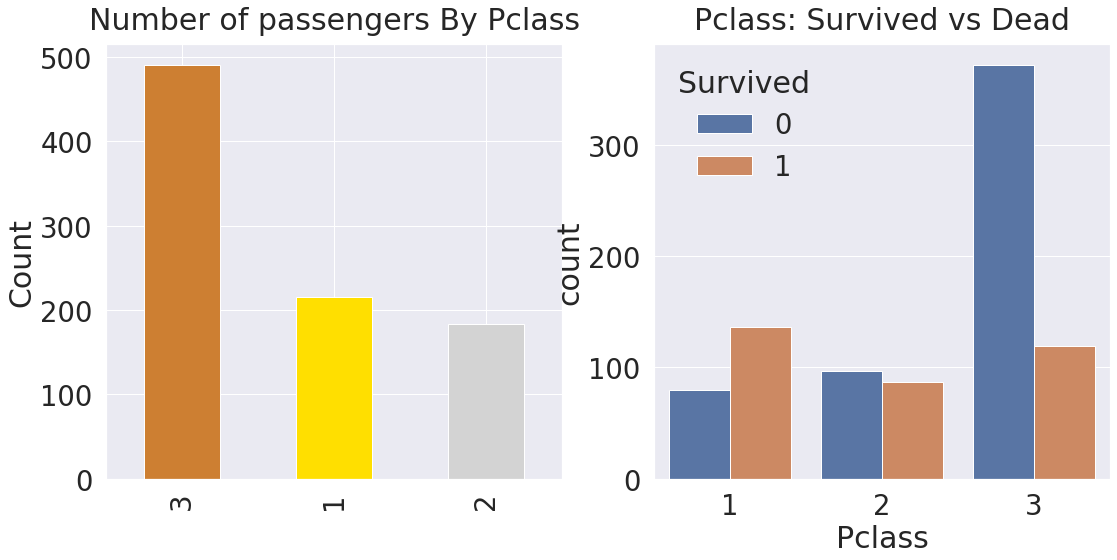

In [933]:
#y_position은 그래프 위치
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number of passengers By Pclass', y=y_position) 
ax[0].set_ylabel('Count') 
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position) 
plt.show()

# 2.2 Sex

<function matplotlib.pyplot.show>

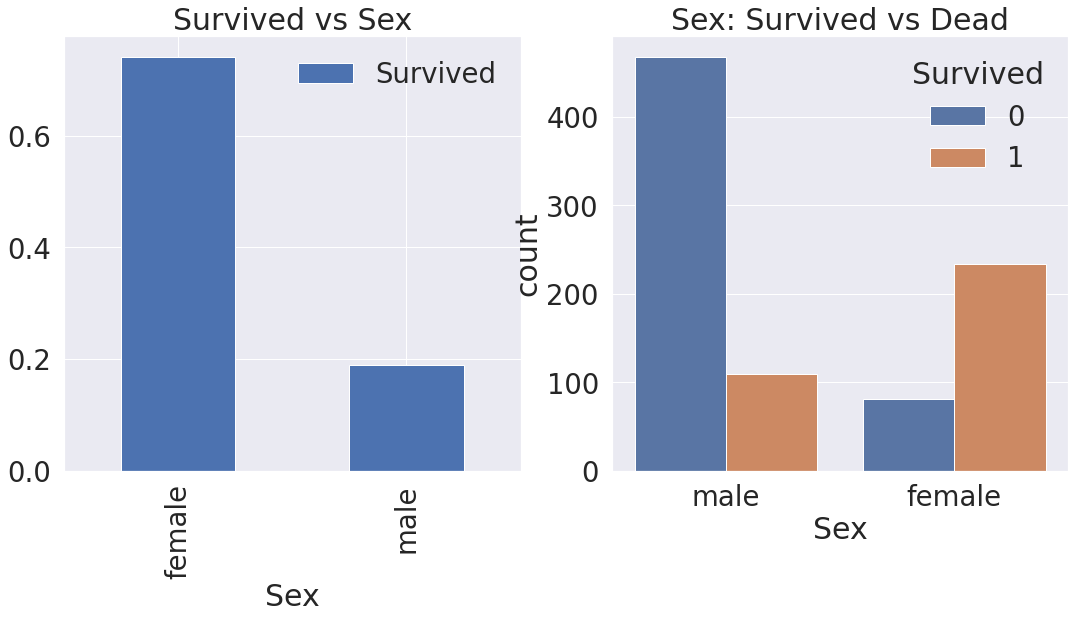

In [934]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show

In [935]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [936]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


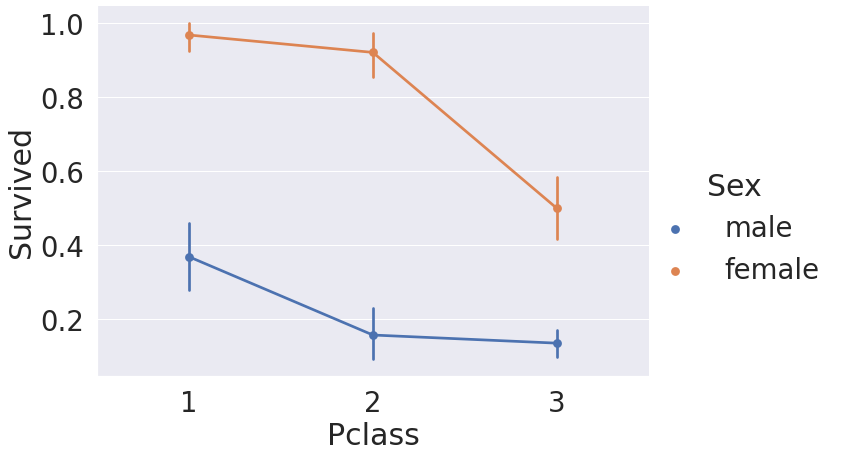

In [937]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)

# -Lady first,
# -Money brings survival?

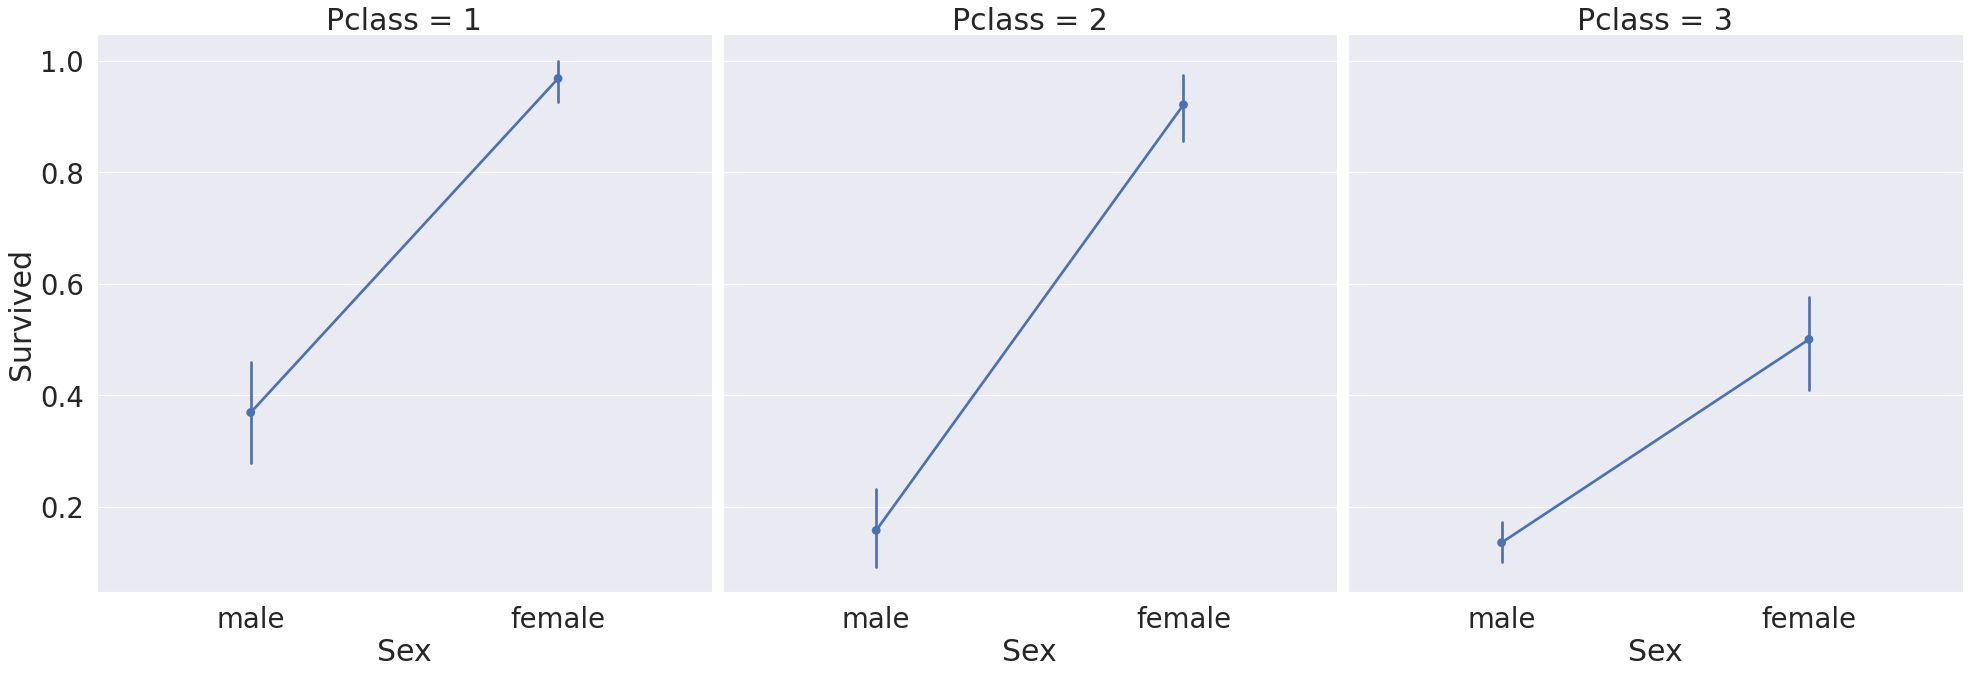

In [938]:
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=df_train,saturation=5,size=9,aspect=1)

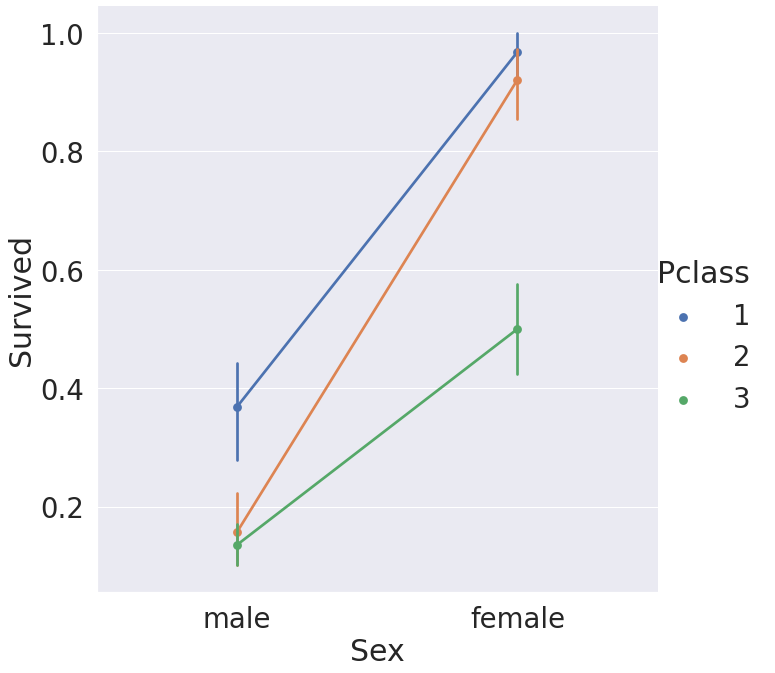

In [939]:
sns.factorplot(x='Sex',y='Survived',hue='Pclass',data=df_train,saturation=5,size=9,aspect=1)

**AGE**
==

In [940]:
print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


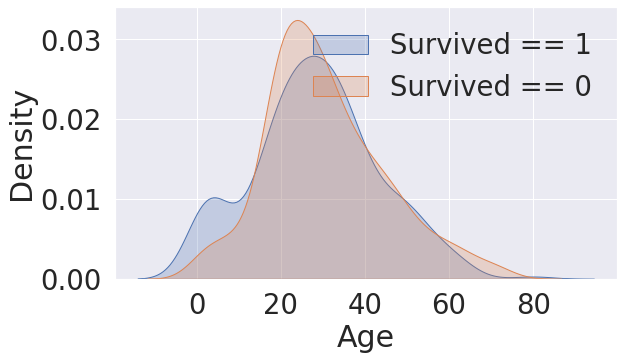

In [941]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], shade=True, ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], shade=True, ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

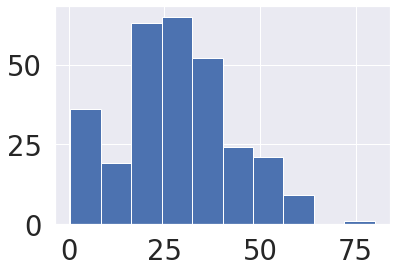

In [942]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [943]:
df_train.iloc[:,1] #Survival bool로 표시

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Figure size 720x720 with 0 Axes>

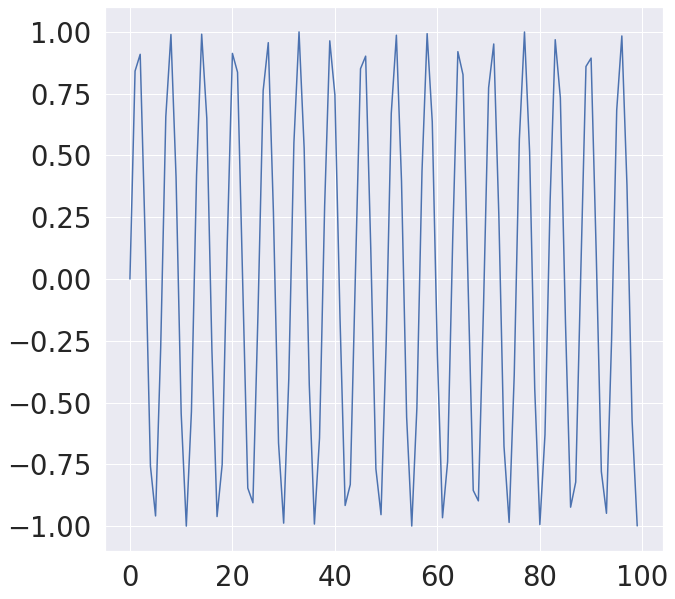

In [944]:
f = plt.figure(figsize=(10, 10)) #방법 1
f, ax = plt.subplots(1, 1, figsize=(10, 10)) # 방법 2
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

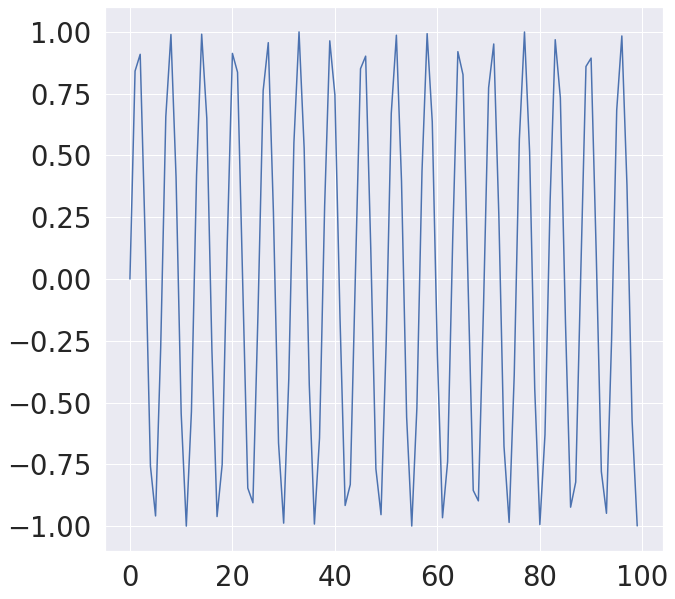

In [945]:
f = plt.figure(figsize=(10, 10)) #방법 1
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

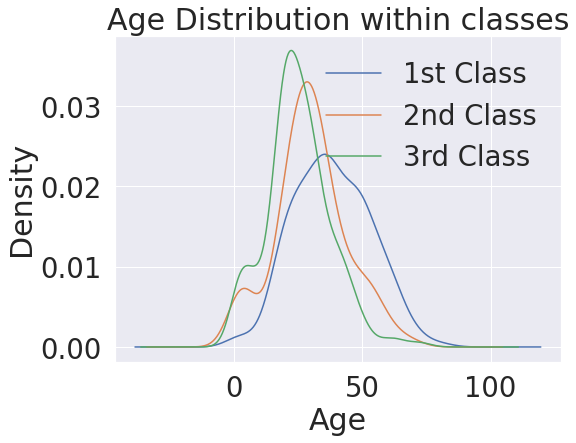

In [946]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

Text(0.5, 0, 'Age')

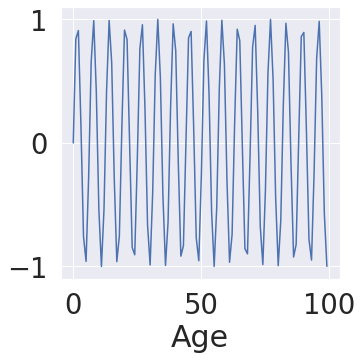

In [947]:
#이 경우 x_label을 위해 plt이 아니라 ax변수를 써야한다.
fig, ax = plt.subplots(1, 1 ,figsize=(5, 5))
a = np.arange(100)
b= np.sin(a)

ax.plot(b)
ax.set_xlabel('Age') 

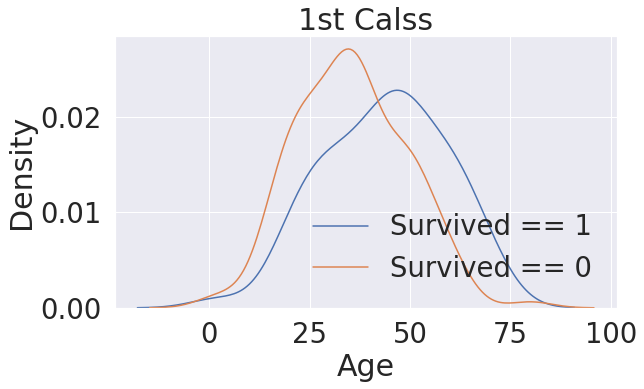

In [948]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Calss')
plt.show()

Text(0.5, 1.0, 'Age Distribution within classes')

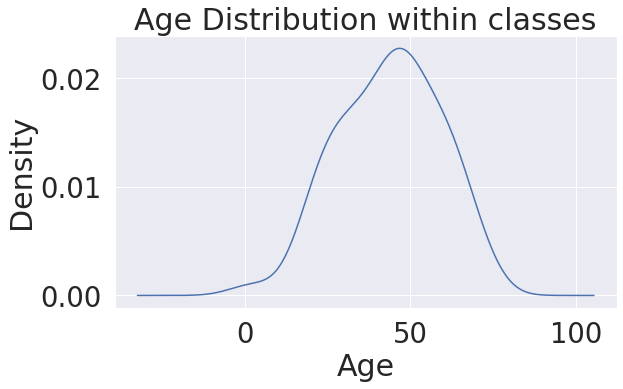

In [949]:
plt.figure(figsize=(9, 5))
df_train['Age'][(df_train['Pclass']==1) & (df_train['Survived'] == 0 )].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
#plt.legend(['1st Class','2nd Class','3rd Class'])

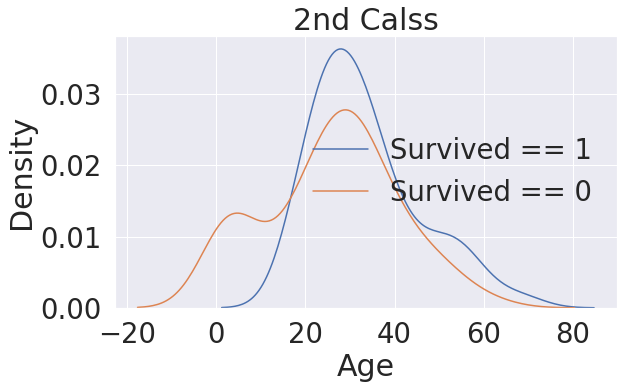

In [950]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd Calss')
plt.show()

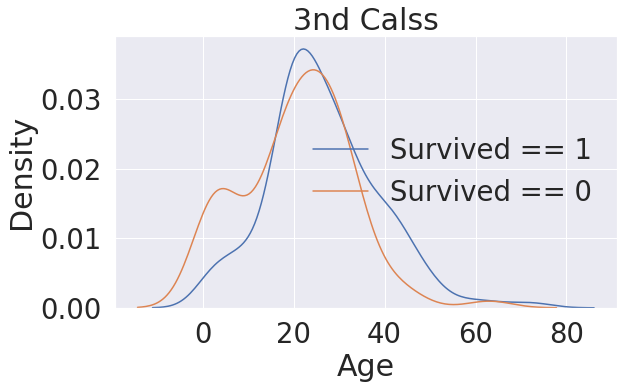

In [951]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass']== 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass']== 3)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3nd Calss')
plt.show()

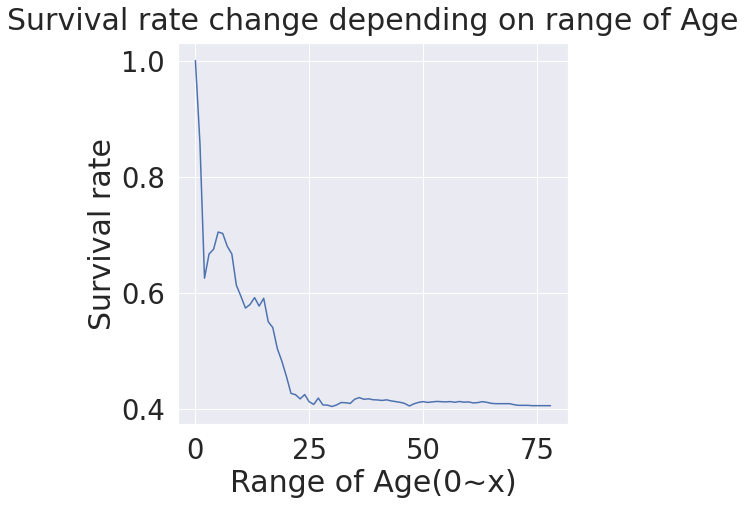

In [952]:
change_age_range_survival_ratio = []

for i in range(1, 80):
  change_age_range_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum()/ len(df_train[df_train['Age']< i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age',y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [953]:
i=10
df_train[df_train['Age']< i]['Survived'].sum()/ len(df_train[df_train['Age']< i]['Survived']) #10살 미만 생존 평균

0.6129032258064516

In [954]:
df_train[df_train['Age']< i]['Survived'].sum() #10살 미만 생존 아이들의 합

38

In [955]:
len(df_train[df_train['Age']< i]['Survived']) # 10살 미만 아이들 수

62

**Pclass,Sex,Age**
==

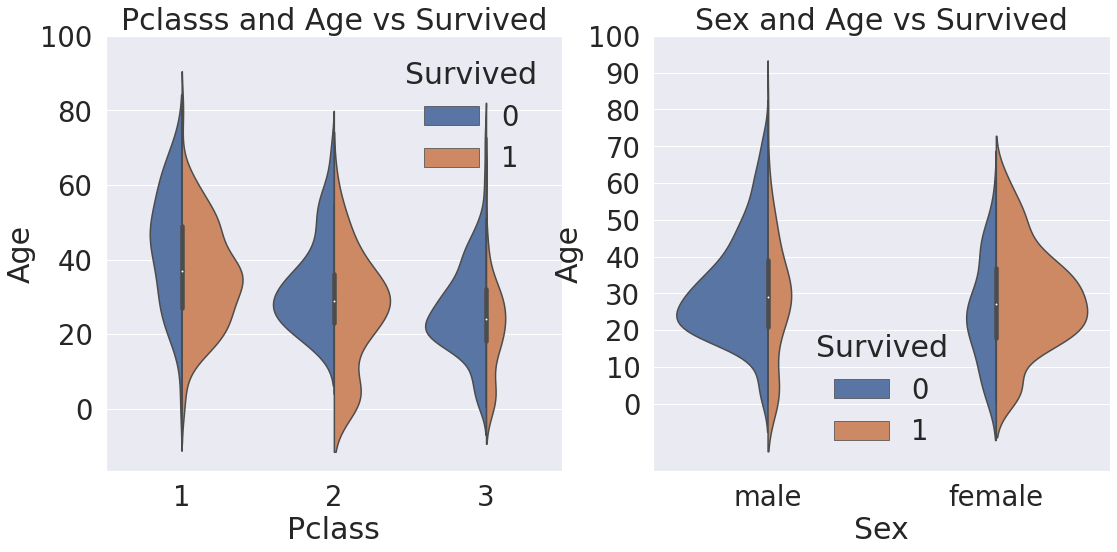

In [956]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train, scale='count' ,split=True, ax=ax[0])
ax[0].set_title('Pclasss and Age vs Survived')
ax[0].set_yticks(range(0,110,20))

sns.violinplot('Sex','Age',hue='Survived',data=df_train, scale='count' ,split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Embarked**
==

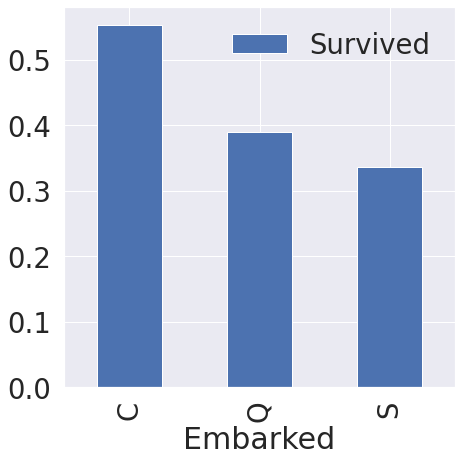

In [957]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [958]:
#value값에 대해서 Sort하는것을 의미 ascending은 오름차순 내림차순
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


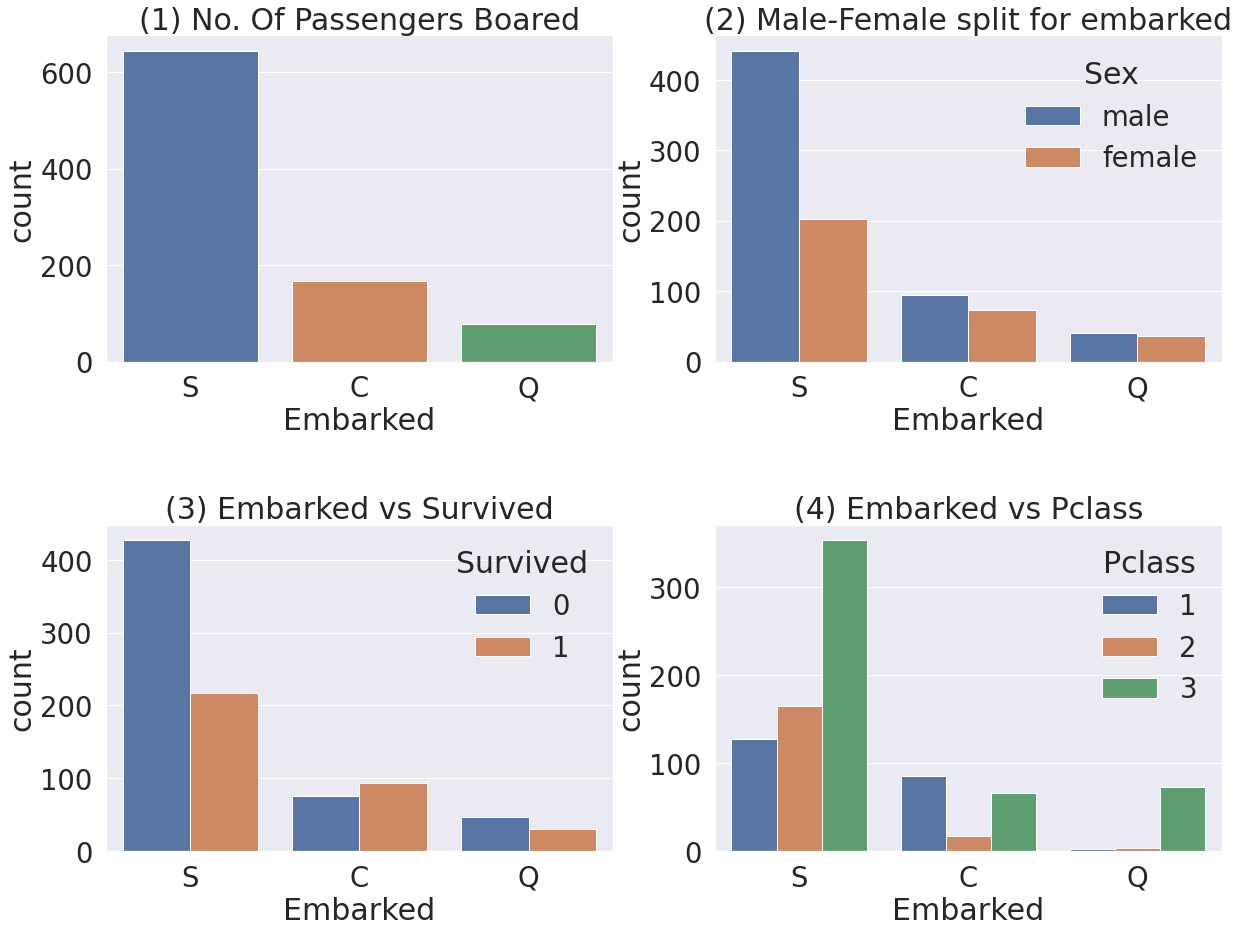

In [959]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked',data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked',hue='Sex' ,data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked',hue='Survived' ,data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass' ,data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5) #간격
plt.show()


#Family - SibSp(형제자매+배우자) + Parch(부모+자녀)**
#새로운 feature 만들기

In [960]:
df_train['FamilySize']=df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize']=df_test['SibSp']+df_test['Parch']+1 #pandas 연산가능

In [961]:
print('Maximum size of Family',df_train['FamilySize'].max())
print('Minimum size of Family',df_train['FamilySize'].min())

Maximum size of Family 11
Minimum size of Family 1


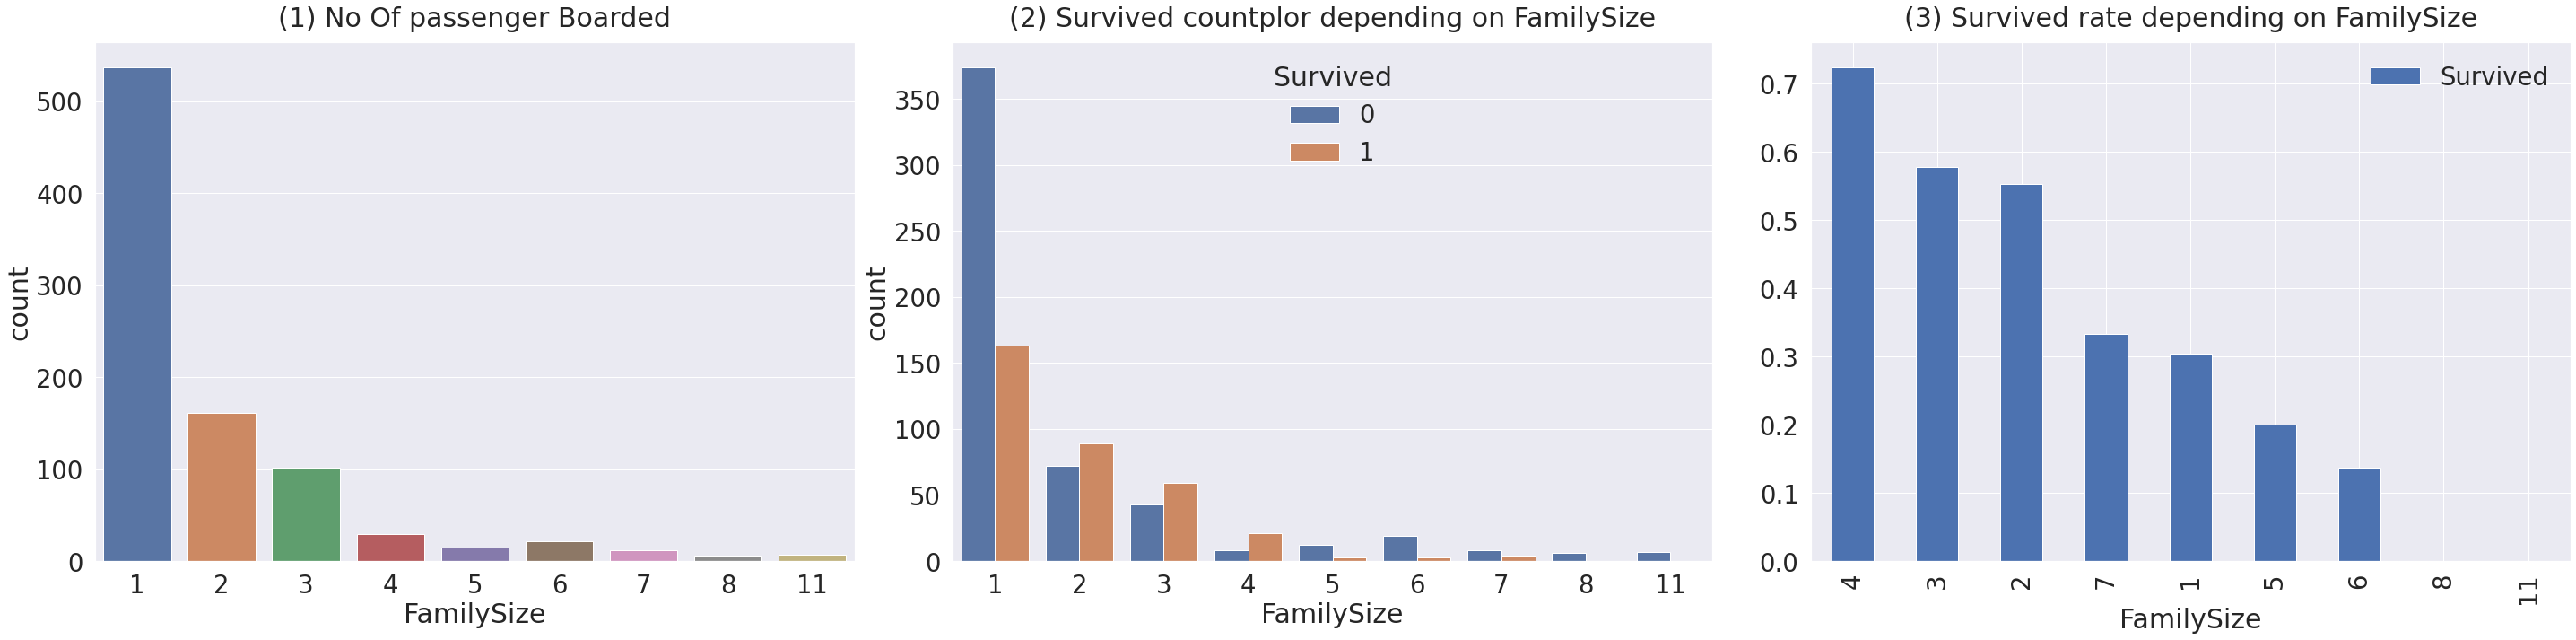

In [962]:
f, ax = plt.subplots(1,3,figsize=(40,10))
sns.countplot('FamilySize',data=df_train,ax=ax[0])
ax[0].set_title('(1) No Of passenger Boarded',y=1.02)

sns.countplot('FamilySize',hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplor depending on FamilySize',y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',y=1.02)

plt.tight_layout()
plt.show()

# Fare (탑승요금)

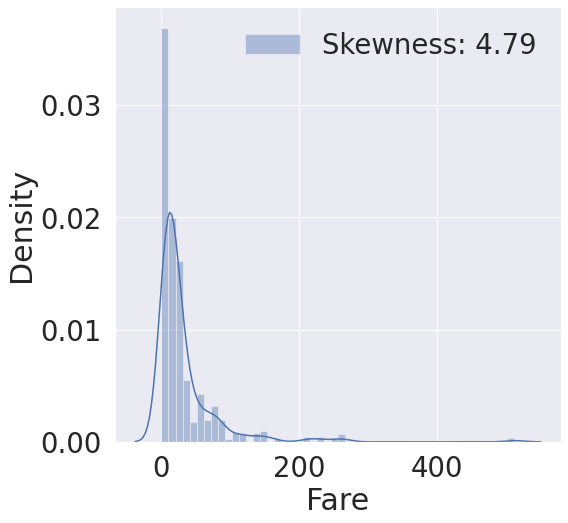

In [963]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#히스토그램을 그려주는 plot Skewness는 왜도 얼마나 비대칭인지 그래프로 그려준다. 
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax) 
g=g.legend(loc='best')

In [964]:
#log씌어주기
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)

In [965]:
x= lambda i: i*i

In [966]:
x(9)

81

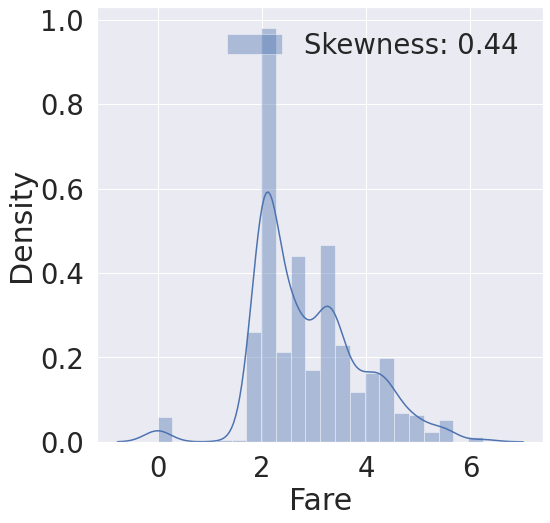

In [967]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#히스토그램을 그려주는 plot Skewness는 왜도 얼마나 비대칭인지 그래프로 그려준다. 
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax) 
g=g.legend(loc='best')

In [968]:
df_train['Ticket'].value_counts()

1601                  7
347082                7
CA. 2343              7
3101295               6
CA 2144               6
                     ..
A/5. 13032            1
350042                1
19952                 1
SOTON/O.Q. 3101311    1
A/4. 20589            1
Name: Ticket, Length: 681, dtype: int64

#**Feature Engineering**

In [969]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [970]:
#A-Z까지 a-z까지 단어와 .앞까지 추출한다.
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [971]:
pd.crosstab(df_train['initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [972]:
df_train['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True) #inplace써야 바로 수정된다.
df_test['initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True) #inplace써야 바로 수정된다.
                                                        

In [973]:
df_train.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


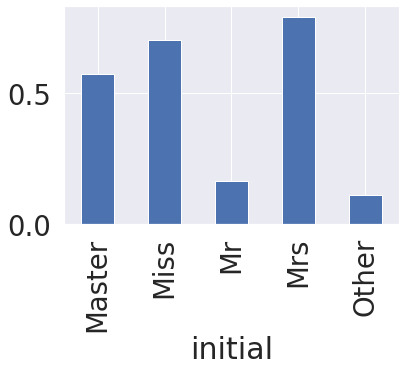

In [974]:
df_train.groupby('initial')['Survived'].mean().plot.bar()

In [975]:
df_all = pd.concat([df_train,df_test]) #df_train과 df_test를 합침

In [976]:
df_all.reset_index(drop=True) #891 train + 418 test 합

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [977]:
df_all.groupby('initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.384615


In [978]:
df_train.loc[1:3,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs


In [979]:
df_train.loc[df_train['Survived']==1] #Survived가 1인놈들만 반환

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [980]:
#나이는 모르지만 Mr인 사람들 120명
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [981]:
#numpy에서 나이를 대입할 수 있다. 평균나이 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Mr'),'Age'] =33
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Mrs'),'Age']= 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Master'),'Age'] =5
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Miss'),'Age']= 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['initial']=='Miss'),'Age']= 45

df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Mr'),'Age'] =33
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Mrs'),'Age']= 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Master'),'Age'] =5
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Miss'),'Age']= 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['initial']=='Miss'),'Age']= 45


In [982]:
#나이 null값이 0이다~!!!
df_train['Age'].isnull().sum()

0

In [983]:
df_train['Embarked'].isnull().sum()

2

In [984]:
df_train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,initial
Embarked,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69,168,168
Q,77,77,77,77,77,77,77,77,77,77,4,77,77
S,644,644,644,644,644,644,644,644,644,644,129,644,644


In [985]:
#제일 많은 S로 null값을 변경한다
df_train['Embarked'].fillna('S',inplace=True)

In [986]:
df_train['Embarked'].isnull().sum()

0

In [987]:
 df_train['Age_cat'] = 0

In [988]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [989]:
df_train.loc[df_train['Age']<10,'Age_cat']=0
df_train.loc[(10<=df_train['Age']) & (df_train['Age']<20),'Age_cat']=1
df_train.loc[(20<=df_train['Age']) & (df_train['Age']<30),'Age_cat']=2
df_train.loc[(30<=df_train['Age']) & (df_train['Age']<40),'Age_cat']=3
df_train.loc[(40<=df_train['Age']) & (df_train['Age']<50),'Age_cat']=4
df_train.loc[(50<=df_train['Age']) & (df_train['Age']<60),'Age_cat']=5
df_train.loc[(60<=df_train['Age']) & (df_train['Age']<70),'Age_cat']=6
df_train.loc[(70<=df_train['Age']),'Age_cat']=7

In [990]:
df_test.loc[df_test['Age']<10,'Age_cat']=0
df_test.loc[(10<=df_test['Age']) & (df_test['Age']<20),'Age_cat']=1
df_test.loc[(20<=df_test['Age']) & (df_test['Age']<30),'Age_cat']=2
df_test.loc[(30<=df_test['Age']) & (df_test['Age']<40),'Age_cat']=3
df_test.loc[(40<=df_test['Age']) & (df_test['Age']<50),'Age_cat']=4
df_test.loc[(50<=df_test['Age']) & (df_test['Age']<60),'Age_cat']=5
df_test.loc[(60<=df_test['Age']) & (df_test['Age']<70),'Age_cat']=6
df_test.loc[(70<=df_test['Age']),'Age_cat']=7

In [991]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [992]:
def category_age(x):
  if x<10:
    return 0
  elif x<20:
    return 1
  elif x<30:
    return 2
  elif x<40:
    return 3
  elif x<50:
    return 4
  elif x<60:
    return 5
  elif x<70:
    return 6 
  else:
    return 7 

In [993]:
df_train['Age_cat_2']=df_train['Age'].apply(category_age)

In [994]:
(df_train['Age_cat']== df_train['Age_cat_2']).all() #all의 반대는 any

True

In [995]:
df_train.drop(['Age','Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'],axis=1,inplace=True)

In [996]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [997]:
df_train.initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [998]:
df_train['initial']= df_train['initial'].map({'Master':0, 'Miss':1,'Mr':2,'Mrs':3,'Other':4})
df_test['initial']= df_test['initial'].map({'Master':0, 'Miss':1,'Mr':2,'Mrs':3,'Other':4}) #숫자로 만들때는 map사용

In [999]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [1000]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [1001]:
df_train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [1002]:
df_train['Sex']=df_train['Sex'].map({'female':0,'male':1})
df_test['Sex']=df_test['Sex'].map({'female':0,'male':1})

In [1003]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,4,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,1,2
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,2


**Feature간 상관관계**
Pearson Correlation

In [1004]:
heatmap_data= df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','initial','Age_cat']]

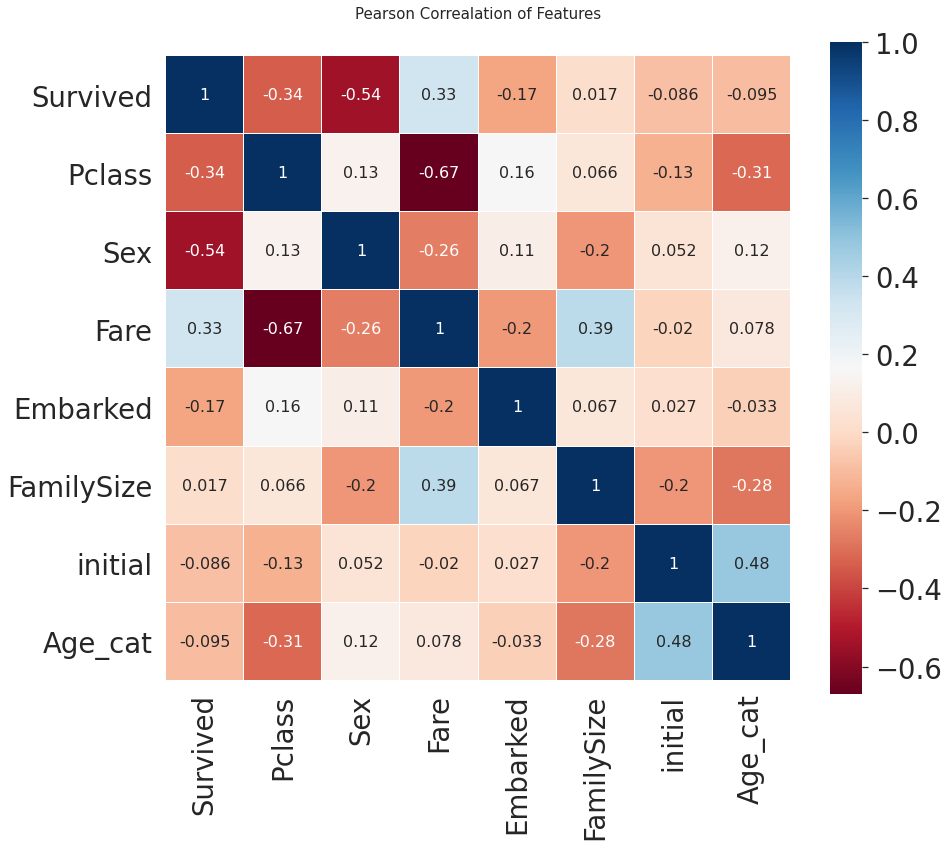

In [1005]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1  , vmax=1.0,
            square=True,cmap=colormap, linecolor='white',annot=True, annot_kws={'size':16})

#Encoding 과정

In [1006]:
df_train = pd.get_dummies(df_train, columns=['initial'],prefix='initial')
df_test = pd.get_dummies(df_test, columns=['initial'],prefix='initial')

In [1007]:
df_train = pd.get_dummies(df_train, columns=['Embarked'],prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'],prefix='Embarked')

In [1008]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True) #필요하지 않은거 빼기
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1, inplace=True)

In [1009]:
df_train

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.564949,1,2,0,0,0,0,1,0,0,1
887,1,1,0,3.401197,1,1,0,1,0,0,0,0,0,1
888,0,3,0,3.154870,4,2,0,1,0,0,0,0,0,1
889,1,1,1,3.401197,1,2,0,0,1,0,0,1,0,0


In [1010]:
df_test.mean()

Pclass         2.265550
Sex            0.636364
Fare          35.627188
FamilySize     1.839713
Age_cat        2.617225
initial_0      0.050239
initial_1      0.188995
initial_2      0.578947
initial_3      0.172249
initial_4      0.009569
Embarked_0     0.244019
Embarked_1     0.110048
Embarked_2     0.645933
dtype: float64

In [1011]:
df_test['Fare'] = df_test['Fare'].fillna(35)

In [1012]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,initial_0,initial_1,initial_2,initial_3,initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2.0,0,0,0,1,0,0,0,1


#Machine Learning

In [1013]:
from sklearn.ensemble import RandomForestClassifier #이진분류 문제
from sklearn import metrics #모델 평가위한 함수들
from sklearn.model_selection import train_test_split #모델을 세우기위해 trainSet을 train과 valid로 나눈다.

In [1014]:
X_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [1015]:
df_test.isnull().sum()

Pclass        0
Sex           0
Fare          0
FamilySize    0
Age_cat       0
initial_0     0
initial_1     0
initial_2     0
initial_3     0
initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [1016]:
df_train.shape

(891, 14)

In [1017]:
X_tr, X_vid, y_tr, y_vid = train_test_split(X_train,target_label, test_size=0.3, random_state=2018)

In [1018]:
model = RandomForestClassifier()
model.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1019]:
prediction = model.predict(X_vid)
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [1020]:
print('총 {}명중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vid.shape[0], 100 * metrics.accuracy_score(prediction,y_vid)))

총 268명중 83.21% 정확도로 생존을 맞춤


In [1021]:
 model.feature_importances_

array([0.09793546, 0.12106093, 0.33430207, 0.0921764 , 0.11967233,
       0.01299138, 0.02912627, 0.12026574, 0.02417193, 0.0042676 ,
       0.01394446, 0.0102122 , 0.01987324])

In [1022]:
from pandas import Series

In [1023]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

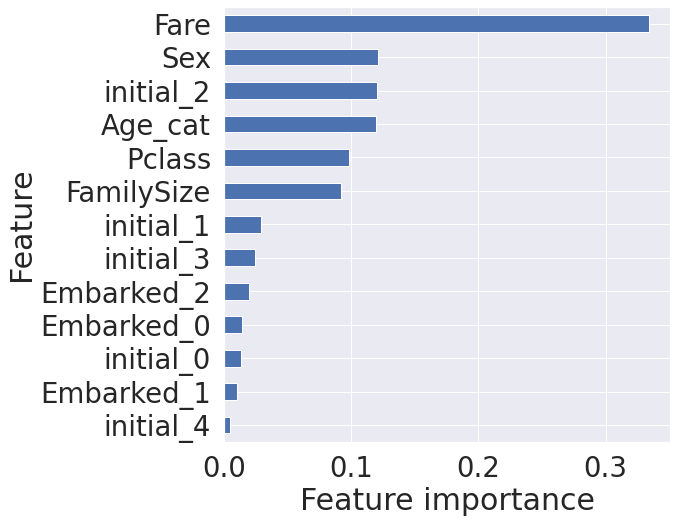

In [1024]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [1025]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gender_submission.csv')

In [1026]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1028]:
prediction = model.predict(X_test)

In [1029]:
submission['Survived'] = prediction

In [1030]:
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/my_first_submission.csv',index=False)

**66점이 나와버렸다.**
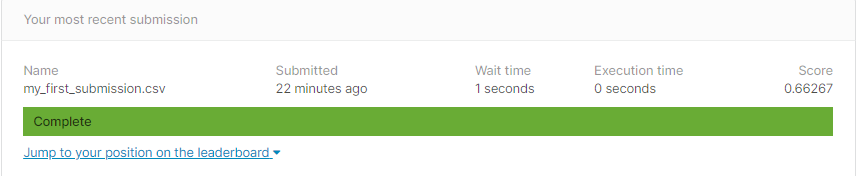